In [1]:
# Install vaderSentiment package for VADER
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.4 MB/s eta 0:00:00


In [2]:
# Data processing
import pandas as pd
import numpy as np


# Import VADER sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Import accuracy_score to check performance
from sklearn.metrics import accuracy_score

# Set a wider colwith
pd.set_option('display.max_colwidth', 1000) #pengaturan display

In [3]:
# Mount Google Drive (untuk mengkoneksikan dengan google drive)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Change directory
import os
os.chdir("/content/drive/My Drive/NLP")

In [5]:
# Print out the current directory
!pwd

/content/drive/My Drive/NLP


In [6]:
# Read in data
amz_review = pd.read_csv('Reviews_Filter.csv', sep='\t', names=['review', 'label'])

In [7]:
# Take a look at the data
amz_review.head(10)

,review,label
0,"Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text",NaN
1,"1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.",NaN
2,"2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,""Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as """"Jumbo"""".""",NaN
3,"3,B000LQOCH0,ABXLMWJIXXAIN,""Natalia Corres """"Natalia Corres"""""",1,1,4,1219017600,""""""Delight"""" says it all"",""This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' """"The Lion, The Witch, and The Wardrobe"""" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.""",NaN
4,"4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.",NaN
5,"5,B006K2ZZ7K,A1UQRSCLF8GW1T,""Michael D. Bigham """"M. Wassir"""""",0,0,5,1350777600,Great taffy,""Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.""",NaN
6,"6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,""I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.""",NaN
7,"7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,""This saltwater taffy had great flavors and was very soft and chewy. Each candy was individually wrapped well. None of the candies were stuck together, which did happen in the expensive version, Fralinger's. Would highly recommend this candy! I served it at a beach-themed party and everyone loved it!""",NaN
8,"8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,""Wonderful, tasty taffy"",This taffy is so good. It is very soft and chewy. The flavors are amazing. I would definitely recommend you buying it. Very satisfying!!",NaN
9,"9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too",NaN


In [8]:
amz_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   review  15000 non-null  object 
 1   label   0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 234.5+ KB


In [9]:
amz_review['label'].value_counts()

Series([], Name: label, dtype: int64)

In [10]:
# Example text
#text = 'GrabNGoInfo.com is a great machine learning tutorial website.'
text = 'The products are expensive and not good'

# VADER Sentiment
vader = SentimentIntensityAnalyzer() #inisilaisasi vader
vader_sentiment = vader.polarity_scores(text) #jalankan vader mengetahui polarity score untuk variabel text


In [11]:
vader_sentiment # print out hasil score nya

{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.3412}

In [12]:
vader_sentiment['compound'] # untuk print compund score nya saja

-0.3412

In [25]:
# Get sentiment score for each review
vader_sentiment = SentimentIntensityAnalyzer() #initialisasi
amz_review['scores_VADER'] = amz_review['review'].apply(lambda s: vader_sentiment.polarity_scores(s)['compound']) #mengambil compound score untuk masing2 review, lalu diletakan di kolom baru bernama 'SCORES_VADER'

In [33]:
# Predict sentiment label for each review
amz_review['pred_VADER'] = amz_review['scores_VADER'].apply(lambda x: 1 if x >=0 else 0)
amz_review.head()

,review,label,scores_VADER,pred_VADER
0,"Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text",NaN,0.0000,1
1,"1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.",NaN,0.9441,1
2,"2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,""Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as """"Jumbo"""".""",NaN,-0.5664,0
3,"3,B000LQOCH0,ABXLMWJIXXAIN,""Natalia Corres """"Natalia Corres"""""",1,1,4,1219017600,""""""Delight"""" says it all"",""This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' """"The Lion, The Witch, and The Wardrobe"""" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.""",NaN,0.8138,1
4,"4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.",NaN,0.4404,1


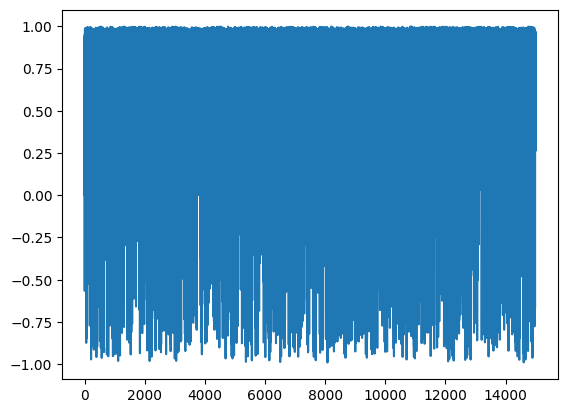

In [34]:
import matplotlib.pyplot as plt
amz_review['scores_VADER'].plot()
plt.show()

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 9)
sns.set()
sns.set_context("talk")

<ipython-input-36-b68407767151>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(coffe['scores_VADER'], hist=True, label='coffe')


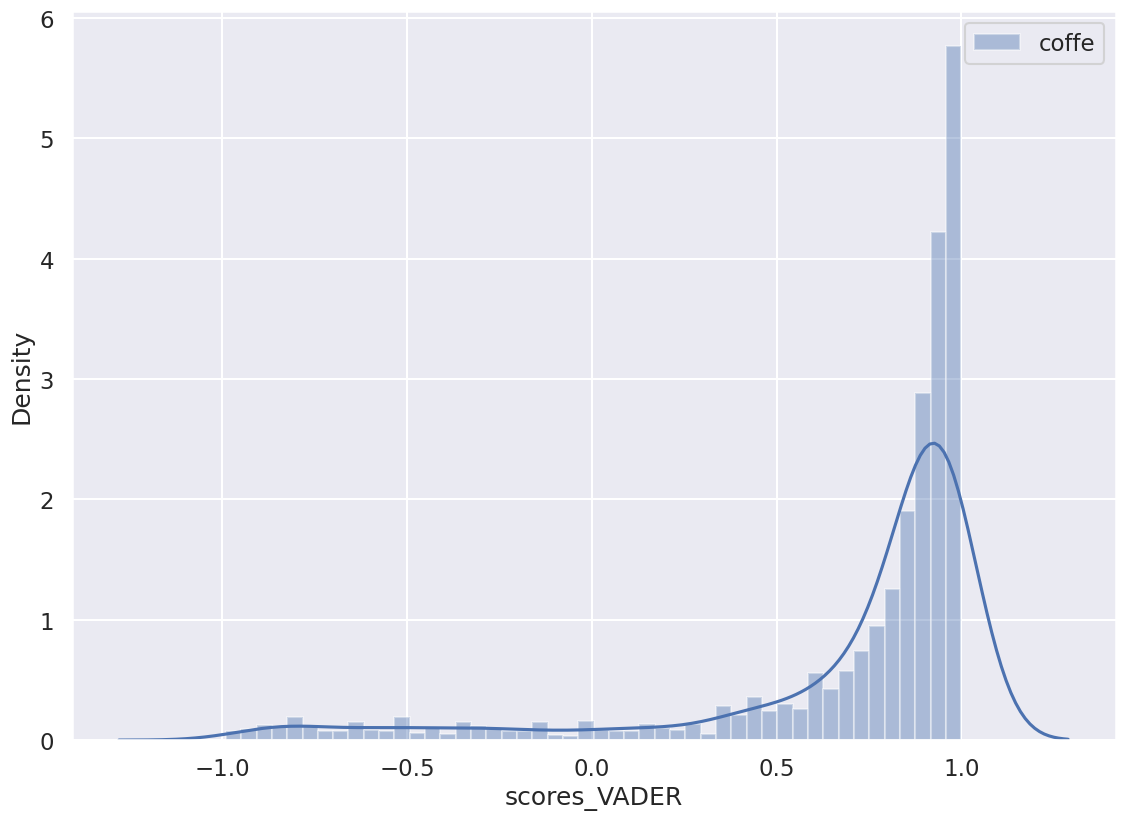

In [36]:
coffe = amz_review[amz_review['review'].str.contains('coffe')]

sns.distplot(coffe['scores_VADER'], hist=True, label='coffe')

plt.legend(title='');

<ipython-input-37-ec94507ac3e0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(price['scores_VADER'], hist=True, label='price')


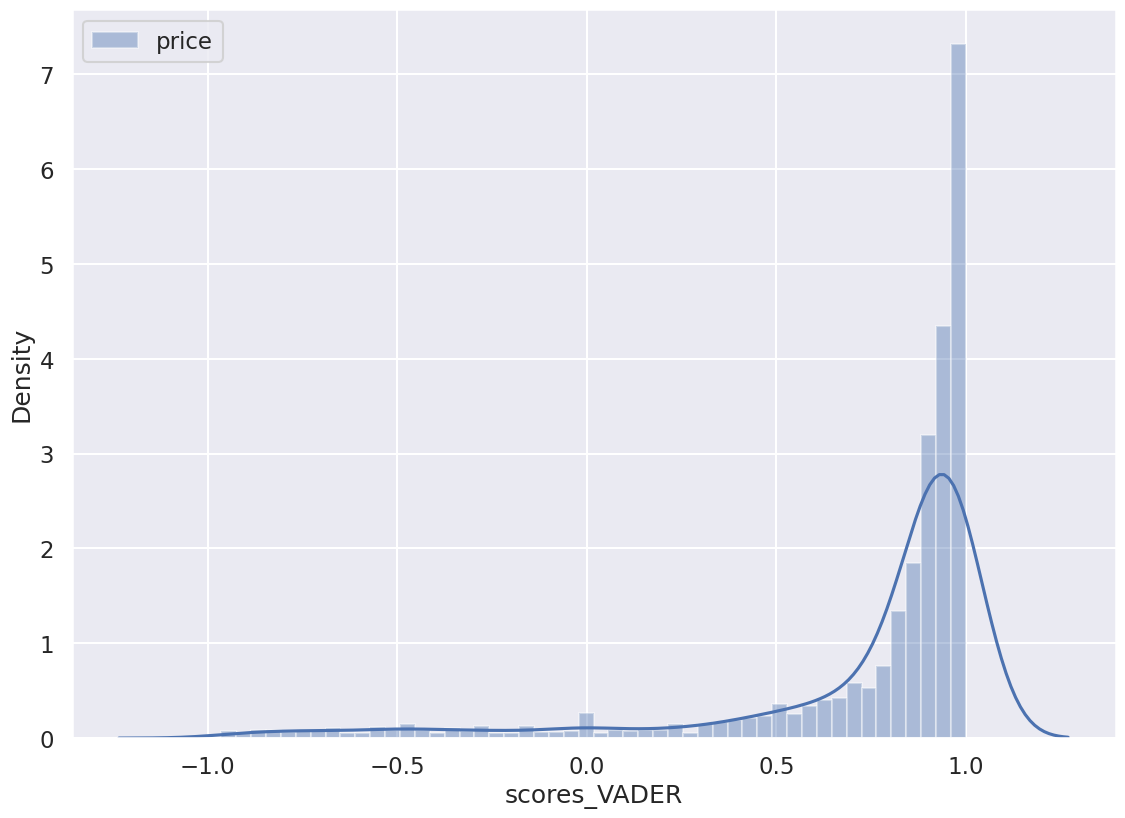

In [37]:
price = amz_review[amz_review['review'].str.contains('price')]

sns.distplot(price['scores_VADER'], hist=True, label='price')

plt.legend(title='');